In [13]:
import pandas as pd
import seaborn as sns

### Cosine similarity

In [15]:
cosine = pd.read_csv("cosine.csv").fillna(0)

In [16]:
cosine.describe()

,GeoId,cosine_similarity
count,139.000000,139.000000
mean,479.741007,0.497840
std,208.226129,0.375710
min,377.000000,0.000000
25%,411.500000,0.124833
50%,446.000000,0.506120
75%,480.500000,0.936741
max,1804.000000,0.993300


#### LEAST COSINE SIMILARITY

In [72]:
cosine[(cosine["cosine_similarity"]<0.125)&(cosine["cosine_similarity"]>0)]

,GeoId,cosine_similarity
23,395,0.070866
43,415,0.112550
113,485,0.119320


#### MOST COSINE SIMILARITY

In [74]:
cosine[(cosine["cosine_similarity"]>0.93)]

,GeoId,cosine_similarity
5,377,0.974543
11,383,0.935781
16,388,0.965532
20,392,0.955699
24,396,0.971475
27,399,0.986171
28,400,0.964974
29,401,0.970538
31,403,0.992985
34,406,0.977570


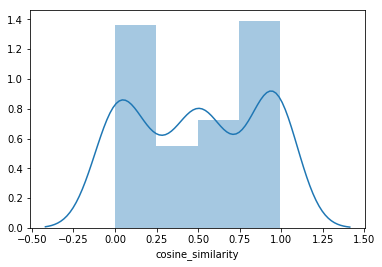

In [17]:
sns.distplot(cosine["cosine_similarity"])

### Dynamic Time Warping

In [10]:
dtw = pd.read_csv("dtw_tower.csv")

In [18]:
dtw.sample()

,GeoId,dtw
96,468,1383.476057


In [11]:
dtw.describe()

,GeoId,dtw
count,139.000000,139.000000
mean,479.741007,2097.579502
std,208.226129,2157.134740
min,377.000000,1.414214
25%,411.500000,443.336620
50%,446.000000,1520.175319
75%,480.500000,2936.717489
max,1804.000000,11157.846701


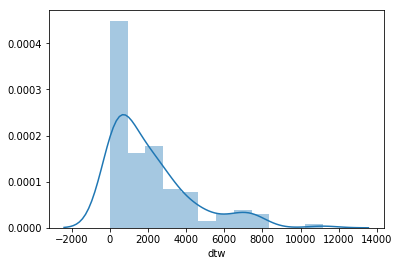

In [19]:
sns.distplot(dtw["dtw"])

### Events Frecuency 

In [63]:
hours = pd.read_csv("freq_sub_hours.csv")
days = pd.read_csv("freq_sub_days.csv")

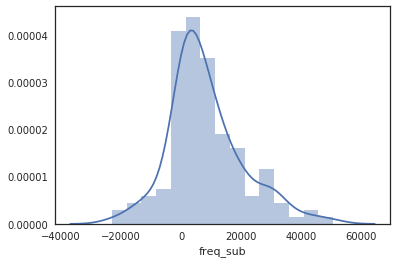

In [53]:
sns.distplot(days["freq_sub"])

#### Hours

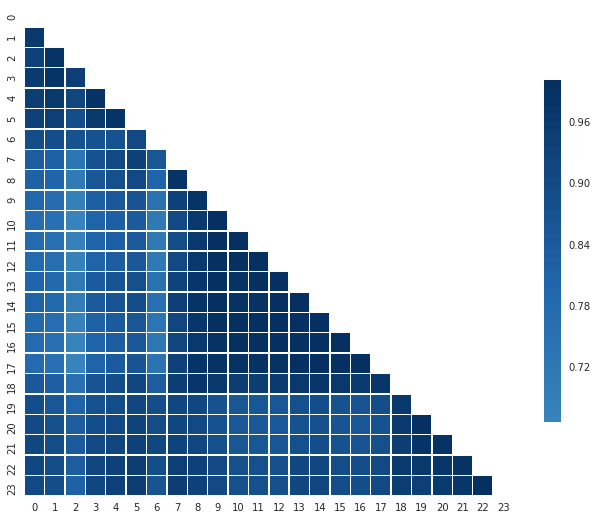

In [48]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")

corr = hours.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(400, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})

#### Entropy

In [54]:
entropy = pd.read_csv("entropy.csv")

In [56]:
entropy.sample(5)

,base,entropy15april,entropy17april,diff,zscore
20,394,0.007665,0.007281,-0.000383,0.234823
75,449,0.005587,0.005111,-0.000475,0.227058
1,1776,0.011655,0.000000,-0.011655,-0.716232
126,500,0.005173,0.004742,-0.000431,0.230810
101,475,0.008342,0.008159,-0.000184,0.251668


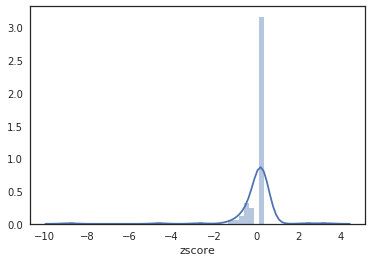

In [57]:
sns.distplot(entropy["zscore"])

In [59]:
galo = cosine.merge(dtw,on="GeoId",how="inner")

In [64]:
mabe = days.merge(hours, on="GeoId", how ="inner")

In [67]:
oreo = galo.merge(mabe, on="GeoId", how ="inner")

In [68]:
df = oreo.merge(entropy, left_on = "GeoId",right_on="base",how="inner")

In [69]:
df.describe()

,GeoId,cosine_similarity,dtw,freq_sub,0,1,2,3,4,5,...,19,20,21,22,23,base,entropy15april,entropy17april,diff,zscore
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,1.390000e+02
mean,479.741007,0.497840,2097.579502,8290.719424,141.086331,84.474820,47.899281,83.604317,94.158273,118.043165,...,381.064748,346.395683,318.136691,287.122302,243.194245,479.741007,0.010077,0.006910,-0.003166,-1.916932e-17
std,208.226129,0.375710,2157.134740,12430.117582,336.795394,229.816446,203.539701,182.994916,172.849908,186.025823,...,656.995888,609.281884,550.666687,480.304515,391.495236,208.226129,0.011000,0.006802,0.011895,1.003617e+00
min,377.000000,0.000000,1.414214,-23065.000000,-865.000000,-672.000000,-612.000000,-497.000000,-447.000000,-438.000000,...,-1196.000000,-1119.000000,-998.000000,-866.000000,-711.000000,377.000000,0.000000,0.000000,-0.108104,-8.854022e+00
25%,411.500000,0.124833,443.336620,1020.500000,7.000000,9.000000,0.000000,8.500000,10.000000,14.500000,...,25.000000,19.000000,31.500000,32.000000,29.000000,411.500000,0.005938,0.004899,-0.000670,2.105922e-01
50%,446.000000,0.506120,1520.175319,5637.000000,96.000000,67.000000,36.000000,58.000000,68.000000,84.000000,...,190.000000,170.000000,163.000000,169.000000,150.000000,446.000000,0.007108,0.005757,-0.000461,2.282902e-01
75%,480.500000,0.936741,2936.717489,13958.500000,255.500000,185.000000,137.000000,177.000000,178.000000,216.000000,...,705.000000,658.500000,589.500000,518.000000,420.000000,480.500000,0.009225,0.008024,-0.000356,2.370922e-01
max,1804.000000,0.993300,11157.846701,50675.000000,1746.000000,864.000000,642.000000,738.000000,713.000000,794.000000,...,2652.000000,2423.000000,2201.000000,2127.000000,1981.000000,1804.000000,0.108104,0.040504,0.036004,3.304943e+00


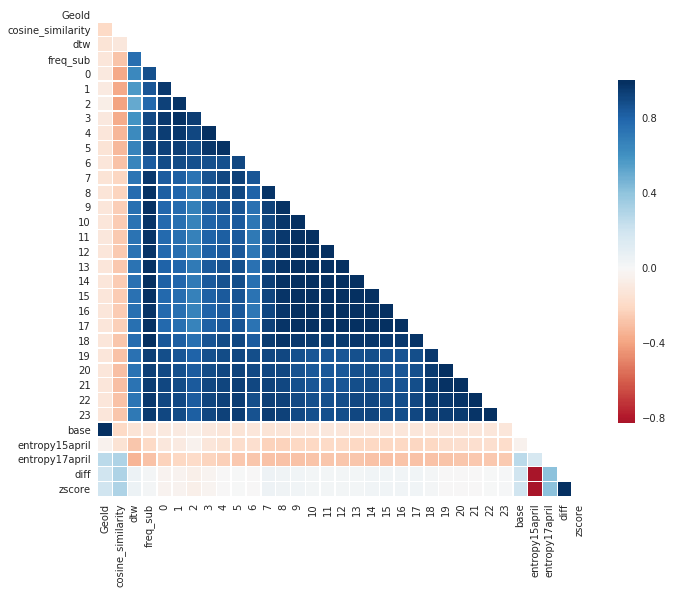

In [70]:
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")

corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(400, 5, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="RdBu", vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .7})